# Предобработка данных

Скачаем данные с kaggle

In [ ]:
!pip -q install kaggle

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, shutil
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.copy('/content/drive/MyDrive/kaggle/kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 0o600)

Mounted at /content/drive


In [ ]:
!mkdir -p data
!kaggle competitions files -c titanic
!kaggle competitions download -c titanic -p data
!unzip -qo data/titanic.zip -d data
!ls -l data

name                         size  creationDate                
---------------------  ----------  --------------------------  
gender_submission.csv        3258  2018-04-09 05:33:22.396000  
test.csv                    28629  2018-04-09 05:33:22.396000  
train.csv                   61194  2018-04-09 05:33:22.396000  
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 108MB/s]
total 128
-rw-r--r-- 1 root root  3258 Dec 11  2019 gender_submission.csv
-rw-r--r-- 1 root root 28629 Dec 11  2019 test.csv
-rw-r--r-- 1 root root 34877 Dec 11  2019 titanic.zip
-rw-r--r-- 1 root root 61194 Dec 11  2019 train.csv


Импортируем базовые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Прочитаем тренировочные и тестовые данные

In [ ]:
df_train = pd.read_csv("/content/data/train.csv")
df_test = pd.read_csv("/content/data/test.csv")

Посмотрим информаицю о них

In [ ]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Добавим новый столбец, получив из имени статус человека, поскольку такой показатель может оказать хорошее влияние на работу модели

In [ ]:
df_train["Title"] = df_train["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()
df_test["Title"] = df_test["Name"].str.split(",").str[1].str.split(".").str[0]

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


Обозначим признаки

In [ ]:
numerical_columns = ['Age', 'Fare']
categorical_columns = ['Pclass', 'SibSp', 'Parch', 'Title', 'Sex']
target_column = ['Survived']

Возьмём индексы пассажиров в тестовом наборе данных

In [ ]:
ids = df_test['PassengerId']

Уберем из датафреймов то, что мы не будем использовать

In [ ]:
delete_columns = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin',
    'Embarked'
]

df_train = df_train.drop(delete_columns,axis=1)
df_test = df_test.drop(delete_columns,axis=1)

Проверим данные

In [ ]:
print("Information about train dataframe\n")
df_train.info()

print("\n\n\nInformation about test dataframe\n")
df_test.info()

Information about train dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB



Information about test dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Far

Заполним пустые строки численных признаков

In [ ]:
for column in df_train.columns:
  if df_train[column].dtype in ('int64', 'float64'):
    df_train[column] = df_train[column].fillna(df_train[column].median())

for column in df_test.columns:
  if df_test[column].dtype in ('int64', 'float64'):
    df_test[column] = df_test[column].fillna(df_test[column].median())

Проверим убрались ли пустые значения численных признаков

In [ ]:
print("Information about train dataframe\n")
df_train.info()

print("\n\n\nInformation about test dataframe\n")
df_test.info()

Information about train dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB



Information about test dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Far

Посмомтрим корреляцию числовых признаков между собой

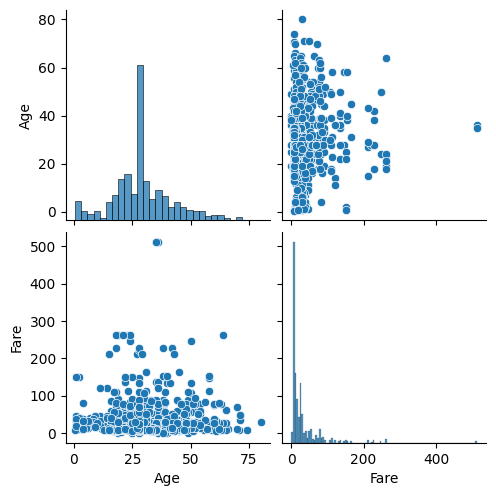

In [ ]:
sns.pairplot(df_train[numerical_columns])

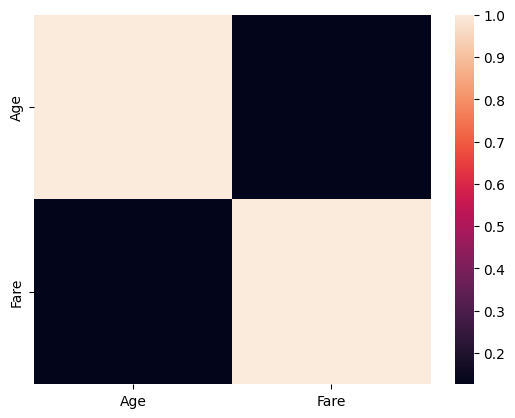

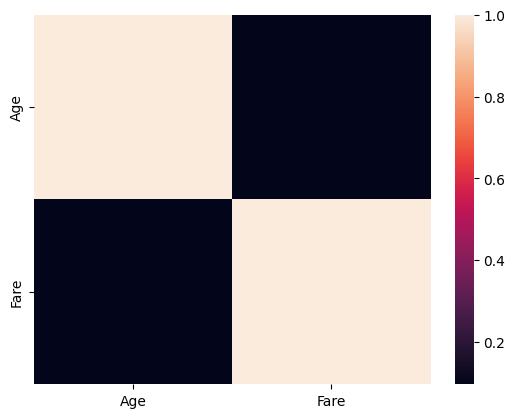

In [ ]:
sns.heatmap(df_train[numerical_columns].corr(method='spearman')); plt.show()
sns.heatmap(df_train[numerical_columns].corr(method='pearson')); plt.show()

Как видно корреляция между данными присутствует, поэтому модель должна показать свою эффективность в работе

Поменяем набор разнообраных статусов на некоторый набор определенных

In [ ]:
canon = {
    'Ms':'Miss', 'Mlle':'Miss',
    'Mme':'Mrs',
    'Capt':'Officer','Col':'Officer','Major':'Officer','Dr':'Officer','Rev':'Officer',
    'Sir':'Royalty','Lady':'Royalty','Countess':'Royalty','Don':'Royalty','Jonkheer':'Royalty','Dona':'Royalty',
    'the Countess':'Royalty'
}

def ensure_title_and_replace(df):
    df['Title'] = df['Title'].astype('string').str.strip()
    return df

df_train['Title'] = df_train['Title'].replace(canon)
df_test['Title'] = df_test['Title'].replace(canon)

Разделим данные

In [ ]:
X_train = df_train.drop(target_column, axis=1)
y_train = df_train[target_column]
y_train = y_train.to_numpy().ravel()

X_test = df_test

# Обучение моделей

Имортируем общие библиотеки

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_predict

Зададим ColumnTransformer

In [ ]:
num_proc = Pipeline([
    ('imp', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_proc = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oh', OneHotEncoder(handle_unknown='ignore'))
])

prep = ColumnTransformer([
    ('num', num_proc, numerical_columns),
    ('cat', cat_proc, categorical_columns),
])

## Random Forest

Теперь обучим модель при помощи Random Forest

Импортируем библиотеки

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Зададим пайплайн с следующими параметрами:
- Заполнение численных пустот медианами
- Используем в качестве метода обучения Random Forest
- Количество деревьев в лесе — 300
- Сбалансируем веса классов, поскольку данные несбалансированы
- Разделим обучение на все ядра

In [ ]:
pipe_rf = Pipeline([
    ('prep', prep),
    ('rf', RandomForestClassifier(
        class_weight='balanced_subsample',
        n_jobs=-1,
        random_state=42
    ))
])

Зададим сетку гиперпараметров

In [ ]:
grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 12],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__min_samples_split': [2, 5, 10],
    'rf__max_features': ['sqrt', 'log2'],
}

Зададим кросс-валидацию на 5 фолдов

In [ ]:
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Обучим модель. Используем GridSearch для поиска лучших гиперпараметров, кросс-валидацию для лучшего обучения и заданный пайплайн

In [ ]:
model_rf = GridSearchCV(pipe_rf, grid_rf, scoring='roc_auc', cv=cv_rf, n_jobs=1, verbose=1)
model_rf.fit(X_train, y_train)
print('CV ROC AUC:', model_rf.best_score_, '\nBest:', model_rf.best_params_)
best_model_rf = model_rf.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
CV ROC AUC: 0.8782651570255691 
Best: {'rf__max_depth': None, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 300}


In [ ]:
proba_oof_rf = cross_val_predict(best_model_rf, X_train, y_train,
                              cv=cv_rf, method="predict_proba")[:, 1]

In [ ]:
ths_rf = np.linspace(0, 1, 1001)
accs_rf = [accuracy_score(y_train, (proba_oof_rf >= t).astype(int)) for t in ths_rf]
best_thr_rf = ths_rf[int(np.argmax(accs_rf))]
print(f"Best threshold by OOF accuracy: {best_thr_rf:.4f} | OOF acc={max(accs_rf):.4f}")

Best threshold by OOF accuracy: 0.5680 | OOF acc=0.8361


In [ ]:
proba_pos_rf = best_model_rf.predict_proba(X_train)[:, 1]

Изобразим ROC-кривую

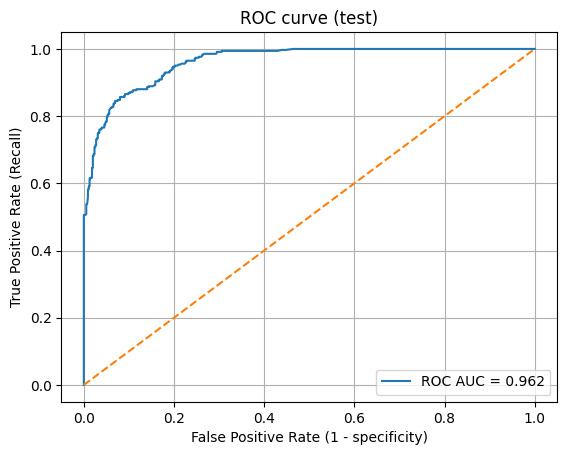

In [ ]:
roc_auc = roc_auc_score(y_train, proba_pos_rf)
fpr, tpr, ths = roc_curve(y_train, proba_pos_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve (test)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Предскажем метки на тестовых данных

In [ ]:
proba_test_rf = best_model_rf.predict_proba(X_test)[:, 1]
y_pred_test_rf = (proba_test_rf >= best_thr_rf).astype(int)

Сохраним их

In [ ]:
submission_rf = pd.DataFrame({
    'PassengerId': ids.astype(int),
    'Survived': y_pred_test_rf.astype(int)
})

In [ ]:
submission_rf.to_csv('submission_rf.csv', index=False)
print('Saved RandomForest submission.csv')
print(submission_rf.head(), '\nClass balance:', submission_rf['Survived'].value_counts().to_dict())

Saved RandomForest submission.csv
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0 
Class balance: {0: 255, 1: 163}


# K-nn

Импортируем библиотеки

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Зададим пайплайн со следующимии параметрами:

In [ ]:
pipe_knn = Pipeline([
    ('prep', prep),
    ('knn', KNeighborsClassifier())
])

Зададим сетку гиперпарамметров

In [ ]:
grid_knn = {
    'knn__n_neighbors': range(1, 15),
    'knn__weights': ['uniform', 'distance']
}

Зададим кросс-валидацию на 5 фолдов

In [ ]:
cv_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Обучим модель. Используем GridSearch для поиска лучших гиперпараметров, кросс-валидацию для лучшего обучения и заданный пайплайн

In [ ]:
model_knn = GridSearchCV(pipe_knn, grid_knn, scoring='roc_auc', cv=cv_knn, n_jobs=1, verbose=1)
model_knn.fit(X_train, y_train)
print('CV ROC AUC:', model_knn.best_score_, '\nBest:', model_knn.best_params_)
best_model_knn = model_knn.best_estimator_

Fitting 5 folds for each of 28 candidates, totalling 140 fits
CV ROC AUC: 0.868434282404988 
Best: {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}


In [ ]:
proba_oof_knn = cross_val_predict(best_model_knn, X_train, y_train,
                              cv=cv_knn, method="predict_proba")[:, 1]

In [ ]:
ths_knn = np.linspace(0, 1, 1001)
accs_knn = [accuracy_score(y_train, (proba_oof_knn >= t).astype(int)) for t in ths_knn]
best_thr_knn = ths_knn[int(np.argmax(accs_knn))]
print(f"Best threshold by OOF accuracy: {best_thr_knn:.4f} | OOF acc={max(accs_knn):.4f}")

Best threshold by OOF accuracy: 0.4450 | OOF acc=0.8159


In [ ]:
proba_pos_knn = best_model_knn.predict_proba(X_train)[:, 1]

Отобразим ROC-кривую

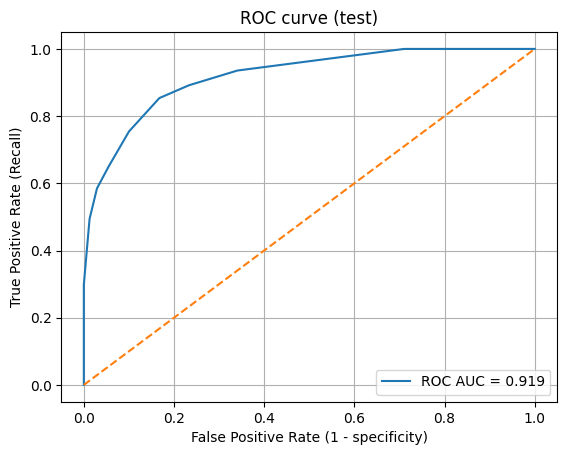

In [ ]:
roc_auc = roc_auc_score(y_train, proba_pos_knn)
fpr, tpr, ths = roc_curve(y_train, proba_pos_knn)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve (test)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Предскажем метки на тестовых данных

In [ ]:
proba_test_knn = best_model_knn.predict_proba(X_test)[:, 1]
y_pred_test_knn = (proba_test_knn >= best_thr_knn).astype(int)

Сохраним их

In [ ]:
submission_knn = pd.DataFrame({
    'PassengerId': ids.astype(int),
    'Survived': y_pred_test_knn.astype(int)
})

In [ ]:
submission_knn.to_csv('submission_knn.csv', index=False)
print('Saved KNN submission.csv')
print(submission_knn.head(), '\nClass balance:', submission_knn['Survived'].value_counts().to_dict())

Saved KNN submission.csv
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0 
Class balance: {0: 258, 1: 160}


## SVM

Импортируем библиотеки

In [ ]:
from sklearn.svm import SVC

Зададим пайплайн со следующимии параметрами:

In [ ]:
pipe_svm = Pipeline([
    ('prep', prep),
    ('svm', SVC(class_weight='balanced', random_state=42, probability=True))
])

Зададим сетку гиперпарамметров

In [ ]:
grid_svm = {
    'svm__kernel': ['linear', 'poly', 'rbf'],
    'svm__C': [1, 1.5, 2, 2.5, 3],
    'svm__gamma': ['scale']
}

Зададим кросс-валидацию на 5 фолдов

In [ ]:
cv_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Обучим модель. Используем GridSearch для поиска лучших гиперпараметров, кросс-валидацию для лучшего обучения и заданный пайплайн

In [ ]:
model_svm = GridSearchCV(pipe_svm, grid_svm, scoring='roc_auc', cv=cv_svm, n_jobs=1, verbose=1)
model_svm.fit(X_train, y_train)
print('CV ROC AUC:', model_svm.best_score_, '\nBest:', model_svm.best_params_)
best_model_svm = model_svm.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
CV ROC AUC: 0.8608077276673443 
Best: {'svm__C': 1.5, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [ ]:
proba_oof_svm = cross_val_predict(best_model_svm, X_train, y_train,
                              cv=cv_svm, method="predict_proba")[:, 1]

In [ ]:
ths_svm = np.linspace(0, 1, 1001)
accs_svm = [accuracy_score(y_train, (proba_oof_svm >= t).astype(int)) for t in ths_svm]
best_thr_svm = ths_svm[int(np.argmax(accs_svm))]
print(f"Best threshold by OOF accuracy: {best_thr_svm:.4f} | OOF acc={max(accs_svm):.4f}")

Best threshold by OOF accuracy: 0.5220 | OOF acc=0.8126


In [ ]:
proba_pos_svm = best_model_svm.predict_proba(X_train)[:, 1]

Изобразим ROC-кривую

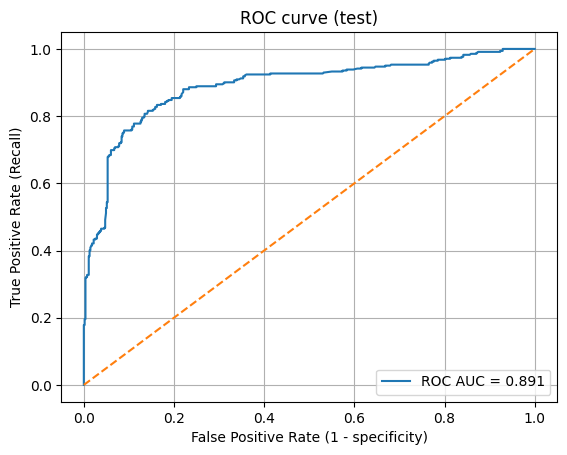

In [ ]:
roc_auc = roc_auc_score(y_train, proba_pos_svm)
fpr, tpr, ths = roc_curve(y_train, proba_pos_svm)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve (test)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Предскажем метки на тестовых данных

In [ ]:
proba_test_svm = best_model_svm.predict_proba(X_test)[:, 1]
y_pred_test_svm = (proba_test_svm >= best_thr_svm).astype(int)

Сохраним их

In [ ]:
submission_svm = pd.DataFrame({
    'PassengerId': ids.astype(int),
    'Survived': y_pred_test_svm.astype(int)
})

In [ ]:
submission_svm.to_csv('submission_svm.csv', index=False)
print('Saved SVM submission.csv')
print(submission_svm.head(), '\nClass balance:', submission_svm['Survived'].value_counts().to_dict())

Saved SVM submission.csv
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1 
Class balance: {0: 238, 1: 180}


## Blender

In [66]:
proba_test_blend = 0.33*proba_test_svm + 0.33*proba_test_knn + 0.33*proba_test_rf

submission_blend = pd.DataFrame({'PassengerId': ids,
                           'Survived': (proba_test_blend >=0.5).astype(int)})
submission_blend.to_csv('submission_blend.csv', index=False)
print('Saved Blender submission_blend.csv')
print(submission_blend.head(), '\nClass balance:', submission_blend['Survived'].value_counts().to_dict())

Saved Blender submission_blend.csv
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1 
Class balance: {0: 232, 1: 186}
